<a href="https://colab.research.google.com/github/AgomferAustral/DMA-Caras/blob/main/EigenfacesMZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# conexion al Google Drive
from google.colab import drive
drive.mount('/content/.drive')

Drive already mounted at /content/.drive; to attempt to forcibly remount, call drive.mount("/content/.drive", force_remount=True).


In [2]:
!pip install --upgrade mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible.


In [3]:
# Importacion de librerias
import mediapipe as mp

In [4]:
import os
import cv2
import sys
import numpy as np

In [ ]:
#!pip install --upgrade numpy
#!pip install --upgrade scipy

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [5]:
# Definicion de ruta de conexion
ruta_imagenes = '/content/.drive/My Drive/DMA/Eigenfaces'

In [6]:
ListaPersonas = os.listdir(ruta_imagenes)
print('Lista de personas: ', ListaPersonas)

labels = []
facesData = []
label = 0

for nameDir in ListaPersonas:
    personPath = ruta_imagenes + '/' + nameDir
    print('Leyendo las imágenes')
    for fileName in os.listdir(personPath):
        print('Rostros: ', nameDir + '/' + fileName)
        labels.append(label)
        facesData.append(cv2.imread(personPath+'/'+fileName,0))
        image = cv2.imread(personPath+'/'+fileName,0)
        #cv2.imshow('image',image)
        cv2.waitKey(10)
    label = label + 1
print('labels= ',labels)

Lista de personas:  ['Federico', 'Gabriel', 'Natalia', 'Mauricio', 'Noelia R', 'Gustavo', 'Guadalupe', 'Noelia M', 'José', 'Jorgelina', 'Daniel', 'Agustín', 'Cristian', 'Alejandro']
Leyendo las imágenes
Rostros:  Federico/20250321_140311.jpg
Rostros:  Federico/IMG_1077.JPG
Rostros:  Federico/1742907849997.jpg
Rostros:  Federico/IMG_1079.JPG
Rostros:  Federico/1742907850028.jpg
Rostros:  Federico/20250321_140309.jpg
Rostros:  Federico/1742907850046.jpg
Rostros:  Federico/IMG_1078.JPG
Rostros:  Federico/20250321_140307.jpg
Rostros:  Federico/IMG_6796.jpeg
Rostros:  Federico/IMG_7599 2.JPG
Rostros:  Federico/IMG_6797.jpeg
Rostros:  Federico/IMG_4182.JPG
Rostros:  Federico/IMG_8668.jpeg
Rostros:  Federico/IMG_8667.jpeg
Rostros:  Federico/IMG_4183.JPG
Rostros:  Federico/IMG_8666.jpeg
Rostros:  Federico/IMG_1252.jpeg
Rostros:  Federico/IMG_6795.jpeg
Rostros:  Federico/IMG_4181.JPG
Rostros:  Federico/IMG_1253.jpeg
Rostros:  Federico/IMG_1254.jpeg
Rostros:  Federico/IMG_7598.JPG
Rostros:  Fe

In [6]:
# Carga de imagenes
#imagenes = []
#for nombre_archivo in os.listdir(ruta_imagenes):
#       ruta_imagen = os.path.join(ruta_imagenes, nombre_archivo)
#       imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)  # Carga en escala de grises
#       imagenes.append(imagen)

In [7]:
print(f"Se cargaron {len(facesData)} imágenes.")

Se cargaron 529 imágenes.


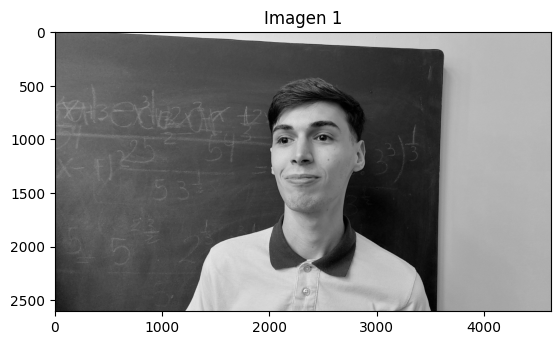

In [ ]:
# Mostrar imagenes importadas
import matplotlib.pyplot as plt

# Mostrar las primeras 5 imágenes
for i in range(min(5, len(facesData))):
    plt.imshow(facesData[i], cmap='gray')
    plt.title(f"Imagen {i + 1}")
    plt.show()

In [9]:
# Deteccion de rostro
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5)

In [10]:
# Recortar imagenes
imagenes_recortadas = []
for imagen in imagenes:
  # Convertir la imagen de escala de grises a RGB
  imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_GRAY2RGB)

  # Detectar rostros en la imagen
  results = face_detection.process(imagen_rgb)

  # Si se encuentra al menos un rostro
  if results.detections:
    for detection in results.detections:
      # Obtener la bounding box del rostro
      bbox = detection.location_data.relative_bounding_box

      # Calcular las coordenadas de la bounding box en píxeles
      h, w = imagen.shape
      x = int(bbox.xmin * w)
      y = int(bbox.ymin * h)
      width = int(bbox.width * w)
      height = int(bbox.height * h)

      # Recortar la imagen usando la bounding box
      rostro_recortado = imagen[y:y+height, x:x+width]

      # Añadir la imagen recortada a la lista
      imagenes_recortadas.append(rostro_recortado)

face_detection.close()

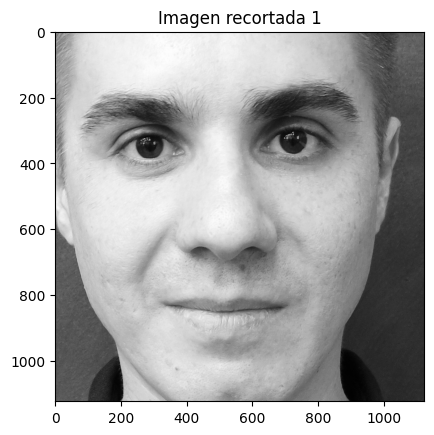

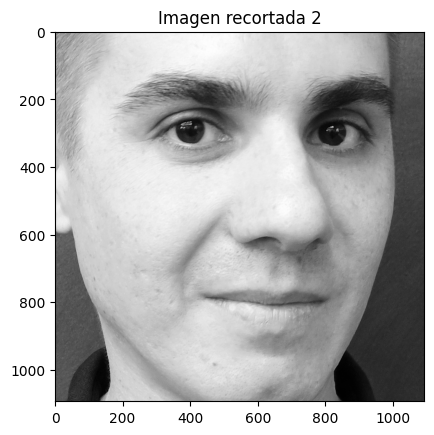

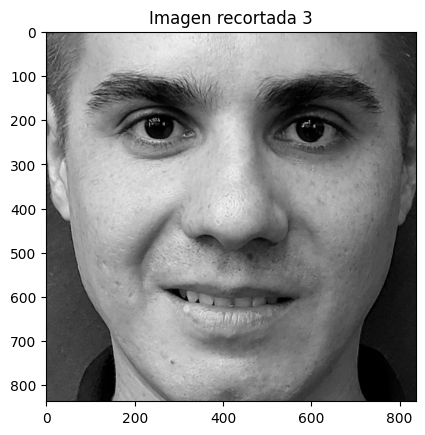

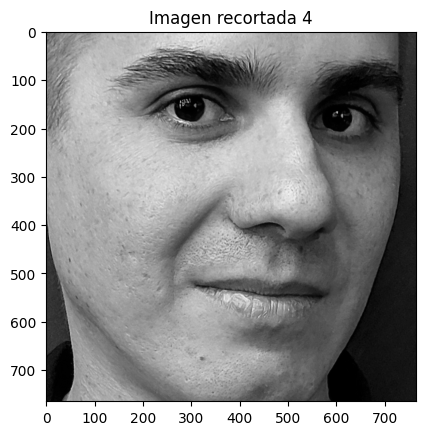

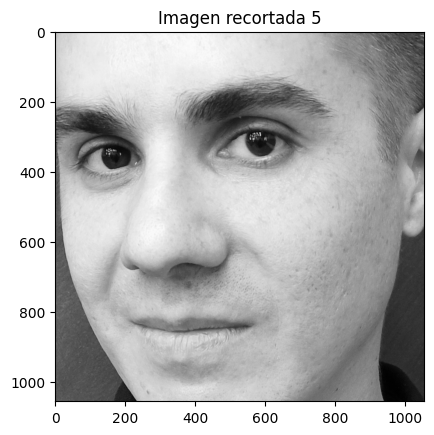

In [11]:
import matplotlib.pyplot as plt

# Mostrar las primeras 5 imágenes recortadas
for i in range(min(5, len(imagenes_recortadas))):
    plt.imshow(imagenes_recortadas[i], cmap='gray')
    plt.title(f"Imagen recortada {i + 1}")
    plt.show()

In [12]:
# Escarlar imagenes
tamaños_comunes = [(70, 70)]

# Escalar las imágenes a cada tamaño común
imagenes_escaladas = [cv2.resize(image, tamaños_comunes[0]) for image in imagenes_recortadas]


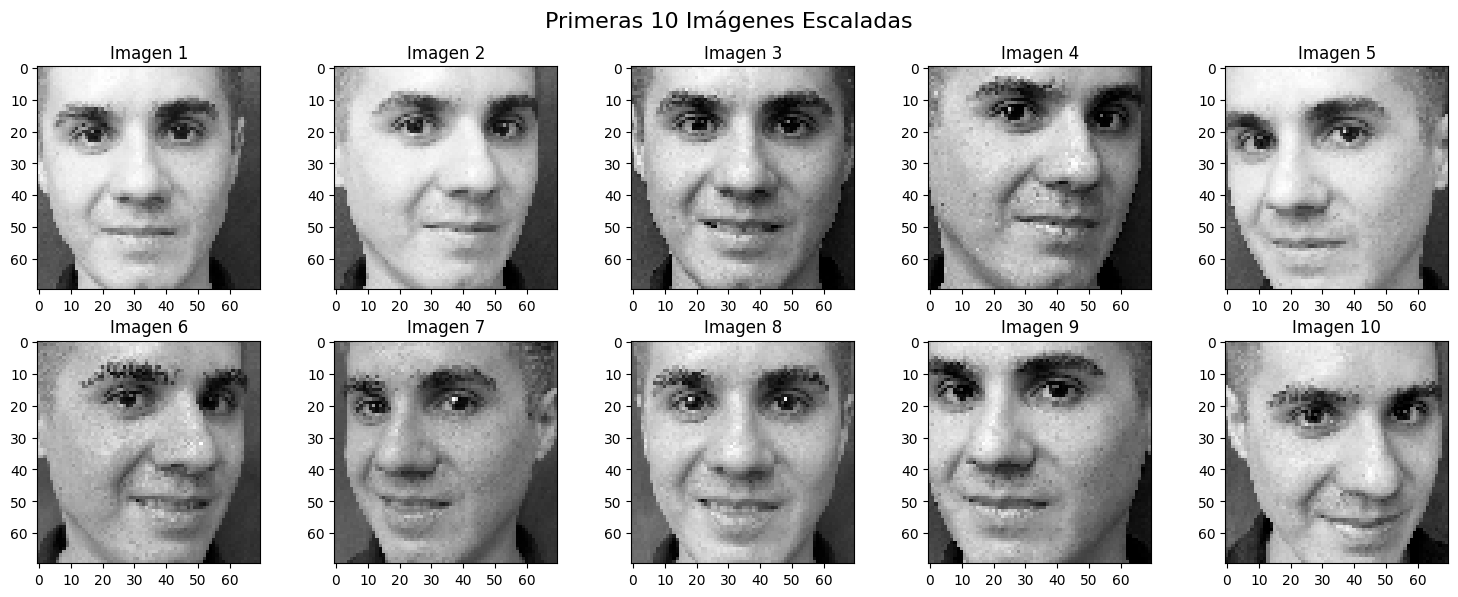

In [13]:
# Visualizar las primeras 10 imágenes escaladas
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 filas, 5 columnas
fig.suptitle("Primeras 10 Imágenes Escaladas", fontsize=16)

for i, imagen in enumerate(imagenes_escaladas[:10]):
    ax = axes[i // 5, i % 5]  # Calcula la posición en la cuadrícula
    ax.imshow(imagen, cmap='gray')  # Muestra la imagen en escala de grises
    ax.set_title(f"Imagen {i + 1}")

    # Agregar valores en los ejes
    ax.set_xticks(np.arange(0, imagen.shape[1], 10))  # Marcas cada 10 píxeles en el eje x
    ax.set_yticks(np.arange(0, imagen.shape[0], 10))  # Marcas cada 10 píxeles en el eje y
    ax.set_xticklabels(np.arange(0, imagen.shape[1], 10))  # Etiquetas cada 10 píxeles en el eje x
    ax.set_yticklabels(np.arange(0, imagen.shape[0], 10))  # Etiquetas cada 10 píxeles en el eje y

plt.tight_layout()
plt.show()

In [ ]:
# Crecion de matris 2D


# Crear la matriz de datos
m = len(imagenes_escaladas)
d = tamaños_comunes[0][0] * tamaños_comunes[0][1]
X = np.reshape(imagenes_escaladas, (m, d))


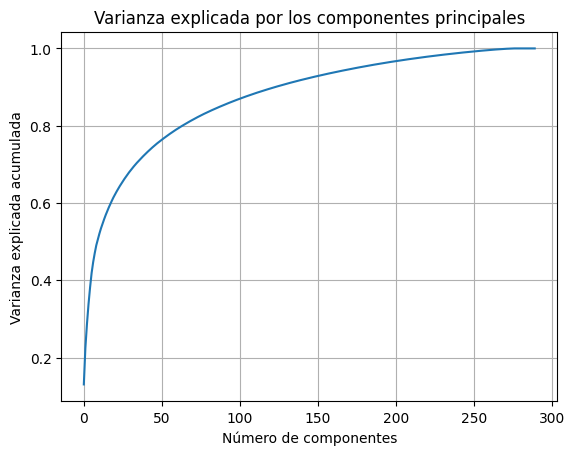

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Ajustar PCA a la matriz de datos (X)
pca = PCA().fit(X)

# Calcular la varianza explicada acumulada
varianza_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Graficar la varianza explicada acumulada
plt.plot(varianza_explicada_acumulada)
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.title("Varianza explicada por los componentes principales")
plt.grid()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X)
componentes_principales = pca.transform(X)

In [ ]:
imagenes_reconstruidas = pca.inverse_transform(componentes_principales)

In [ ]:
imagenes_reconstruidas = imagenes_reconstruidas.reshape((len(imagenes_escaladas), tamaños_comunes[0][0], tamaños_comunes[0][1]))

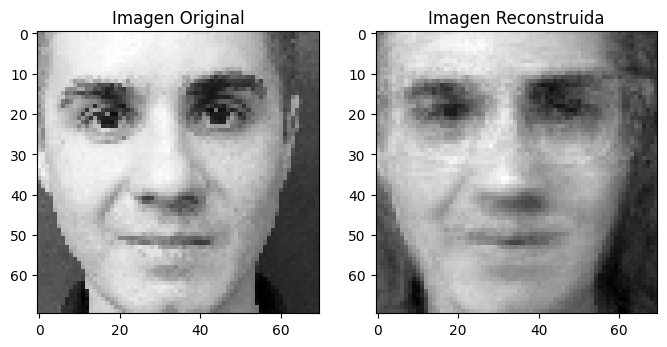

In [ ]:
import matplotlib.pyplot as plt

# Mostrar una imagen original y su reconstrucción
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(imagenes_escaladas[0], cmap='gray')
plt.title("Imagen Original")

plt.subplot(1, 2, 2)
plt.imshow(imagenes_reconstruidas[0], cmap='gray')
plt.title("Imagen Reconstruida")

plt.show()

In [ ]:
from scipy.spatial.distance import euclidean

In [ ]:
# Ejemplo de cálculo de distancia entre el rostro  y el rostro 1
distancia = euclidean(componentes_principales[0], componentes_principales[1])

print(f"Distancia entre el rostro 0 y el rostro 1: {distancia}")

Distancia entre el rostro 0 y el rostro 1: 1926.102546371928


In [ ]:
num_rostros = componentes_principales.shape[0]
matriz_distancias = np.zeros((num_rostros, num_rostros))

for i in range(num_rostros):
     for j in range(i + 1, num_rostros):
       distancia = euclidean(componentes_principales[i], componentes_principales[j])
       matriz_distancias[i, j] = distancia
       matriz_distancias[j, i] = distancia  # La matriz es simétrica

<ipython-input-29-a3dfbe5ace74>:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  enlaces = linkage(matriz_distancias, method='ward')  # Puedes probar otros métodos de enlace


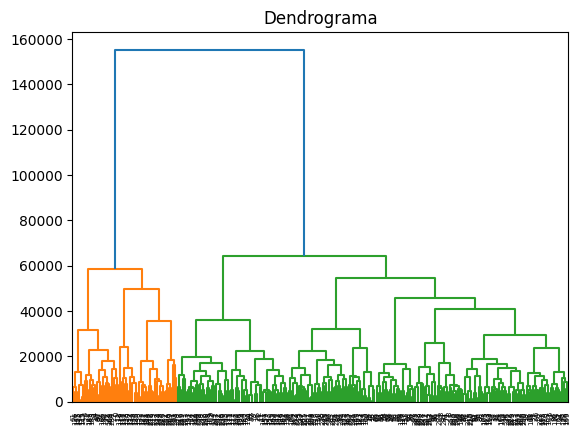

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

enlaces = linkage(matriz_distancias, method='ward')  # Puedes probar otros métodos de enlace
dendrogram(enlaces)
plt.title("Dendrograma")
plt.show()

In [ ]:
# Obtencion de componentes principales

from sklearn.decomposition import PCA

# Aplicar SVD
U, Sigma, VT = np.linalg.svd(X, full_matrices=False)

# Aplicar PCA usando SVD
pca = PCA(n_components=50)  # Reducir a x componentes principales
pca.fit(X)  # Ajustar PCA a la matriz de datos
componentes_principales = pca.transform(X) # Transformar los datos


In [ ]:
from scipy.spatial.distance import euclidean

# Ejemplo de cálculo de distancia entre el rostro 0 y el rostro 1
distancia = euclidean(componentes_principales[0], componentes_principales[1])

print(f"Distancia entre el rostro 0 y el rostro 1: {distancia}")